In [1]:
import pandas as pd

train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')
submission = pd.read_csv('sample_submission.csv', index_col = 'id')

In [2]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
test.head().T

id,300000,300001,300002,300003,300004
bin_0,0,0,1,0,0
bin_1,0,0,0,0,1
bin_2,1,0,1,1,1
bin_3,T,T,F,T,F
bin_4,Y,N,Y,Y,N
nom_0,Blue,Red,Blue,Red,Red
nom_1,Triangle,Square,Square,Star,Trapezoid
nom_2,Axolotl,Lion,Dog,Cat,Dog
nom_3,Finland,Canada,China,China,China
nom_4,Piano,Piano,Piano,Piano,Piano


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### 피처 요약표 만들기

In [6]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values 
    summary['세 번째 값'] = df.loc[2].values 
    
    return summary

resumetable(train)

데이터 세트 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


### 요약표 해석

In [8]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [10]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {len(train[feature].unique())}')

ord_3 고윳값: 15
ord_4 고윳값: 26
ord_5 고윳값: 192


In [13]:
print('day 고윳값:',train['day'].unique())
print('month 고윳값:',train['month'].unique())
print('target 고윳값:',train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


# 데이터 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

[Text(0.5, 1.0, 'Target Distribution')]

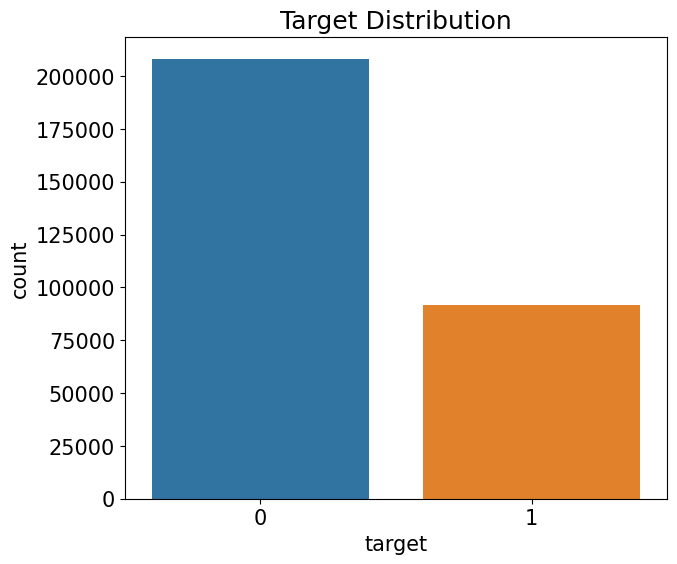

In [15]:
# 타깃값 분포
mpl.rc('font', size=15)
plt.figure(figsize=(7,6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title = 'Target Distribution')

In [18]:
# 첫 번째 Rectangle 객체
rectangle = ax.patches[0]
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [19]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


In [20]:
def write_percent(ax, total_size):
    # 도형 객체를 순회하며 막대 상단에 타깃값 비율 표시
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        # 타깃값 비율
        percent = height/total_size*100
        
        # (x,y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
               y=height + total_size*0.001,  # y축 위치
               s=f'{percent:1.1f}%',         # 입력 텍스트
               ha='center')                  # 가운데 정렬
        

Text(0.5, 1.0, 'Traget Distribution')

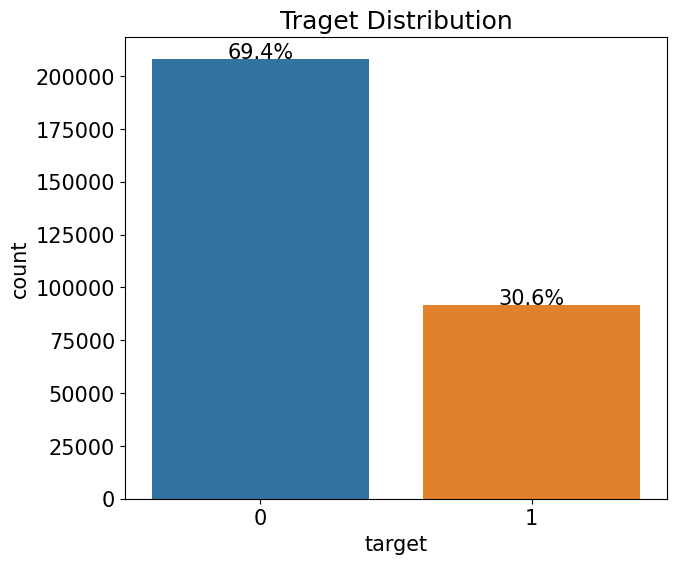

In [22]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data = train)
# 비율 표시
write_percent(ax, len(train))
ax.set_title('Traget Distribution')